<a href="https://colab.research.google.com/github/swapnilghule/DBMSL/blob/master/Sample_model_Maker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tflite-model-maker

     |████████████████████████████████| 616 kB 5.3 MB/s 
     |████████████████████████████████| 87 kB 5.8 MB/s 
     |████████████████████████████████| 120 kB 49.7 MB/s 
     |████████████████████████████████| 3.4 MB 62.6 MB/s 
     |████████████████████████████████| 77 kB 5.0 MB/s 
     |████████████████████████████████| 213 kB 59.5 MB/s 
     |████████████████████████████████| 1.1 MB 51.1 MB/s 
     |████████████████████████████████| 1.1 MB 59.0 MB/s 
     |████████████████████████████████| 1.2 MB 53.6 MB/s 
     |████████████████████████████████| 596 kB 52.6 MB/s 
     |████████████████████████████████| 840 kB 51.5 MB/s 
     |████████████████████████████████| 6.4 MB 42.4 MB/s 
     |████████████████████████████████| 25.3 MB 79.1 MB/s 
     |████████████████████████████████| 47.7 MB 63 kB/s 
     |████████████████████████████████| 352 kB 45.2 MB/s 
     |████████████████████████████████| 99 kB 8.3 MB/s 
     |████████████████████████████████| 210 kB 46.8 MB/s 


In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [ ]:
from zipfile import ZipFile
file_name = '/content/sample_data/fire_dataset.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
image_path = '/content/fire_dataset'

In [ ]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 556, num_label: 2, labels: Danger, Non_Danger.


In [ ]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5
15/15 [==============================] - 28s 2s/step - loss: 0.4081 - accuracy: 0.8771
Epoch 2/5
15/15 [==============================] - 22s 1s/step - loss: 0.2887 - accuracy: 0.9708
Epoch 3/5
15/15 [==============================] - 23s 1s/step - loss: 0.2654 - accuracy: 0.9812
Epoch 4/5
15/15 [==============================] - 23s 2s/step - loss: 0.2436 - accuracy: 0.9833
Epoch 5/5
15/15 [==============================] - 23s 1s/step - loss: 0.2350 - accuracy: 0.9875


In [ ]:
loss, accuracy = model.evaluate(test_data)

2/2 [==============================] - 5s 1s/step - loss: 0.3057 - accuracy: 0.9821


In [ ]:
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 556, num_label: 2, labels: Danger, Non_Danger.


INFO:tensorflow:Load image with size: 556, num_label: 2, labels: Danger, Non_Danger.


In [ ]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

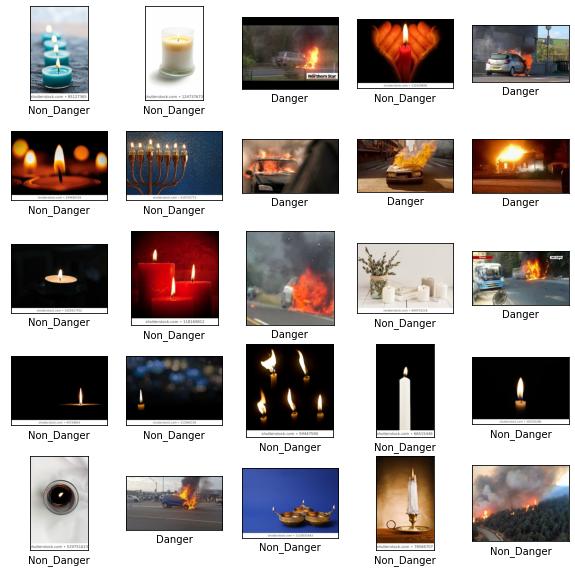

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


13/13 [==============================] - 29s 2s/step - loss: 0.4484 - accuracy: 0.8293 - val_loss: 0.2963 - val_accuracy: 0.9821
Epoch 2/5
13/13 [==============================] - 24s 2s/step - loss: 0.3014 - accuracy: 0.9688 - val_loss: 0.3224 - val_accuracy: 0.9821
Epoch 3/5
13/13 [==============================] - 26s 2s/step - loss: 0.2848 - accuracy: 0.9880 - val_loss: 0.3031 - val_accuracy: 0.9821
Epoch 4/5
13/13 [==============================] - 24s 2s/step - loss: 0.2590 - accuracy: 0.9808 - val_loss: 0.2876 - val_accuracy: 0.9821
Epoch 5/5
13/13 [==============================] - 24s 2s/step - loss: 0.2461 - accuracy: 0.9808 - val_loss: 0.2862 - val_accuracy: 0.9821


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________


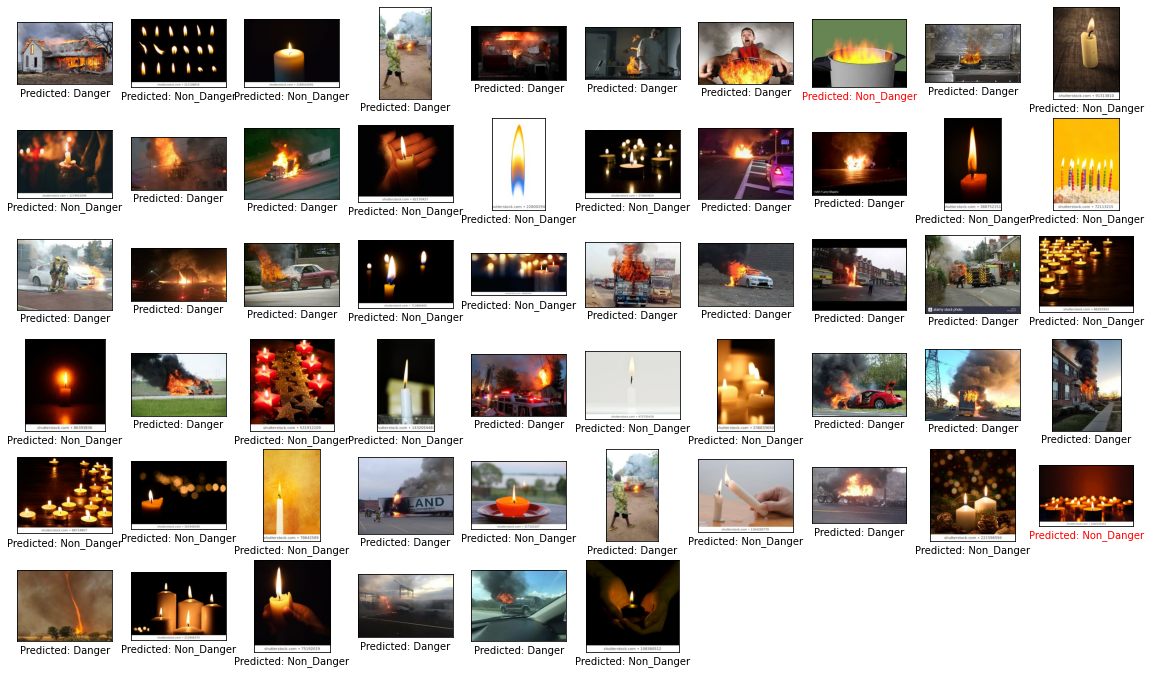

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export(export_dir='.', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt


INFO:tensorflow:Saving labels in ./labels.txt


**RESNET 50**

In [ ]:
res_model = image_classifier.create(train_data, model_spec=model_spec.get('resnet_50'), validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_2 (Hub  (None, 2048)             23564800  
 KerasLayerV1V2)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23,568,898
Trainable params: 4,098
Non-trainable params: 23,564,800
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


13/13 [==============================] - 80s 6s/step - loss: 0.4152 - accuracy: 0.9159 - val_loss: 0.2943 - val_accuracy: 0.9643
Epoch 2/5
13/13 [==============================] - 74s 6s/step - loss: 0.3346 - accuracy: 0.9639 - val_loss: 0.3035 - val_accuracy: 0.9821
Epoch 3/5
13/13 [==============================] - 77s 6s/step - loss: 0.2783 - accuracy: 0.9784 - val_loss: 0.2665 - val_accuracy: 0.9821
Epoch 4/5
13/13 [==============================] - 80s 6s/step - loss: 0.2965 - accuracy: 0.9856 - val_loss: 0.3428 - val_accuracy: 0.9821
Epoch 5/5
13/13 [==============================] - 77s 6s/step - loss: 0.2822 - accuracy: 0.9832 - val_loss: 0.3568 - val_accuracy: 0.9643
